In [51]:

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
from plottable import ColDef, Table
from plottable.plots import image
import matplotlib.patches as patches

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

dfval = pd.read_csv("https://raw.githubusercontent.com/IvoVillanueva/csv2023/main/pbp_Df_clean23.csv")

dfval['license_licenseAbbrev'] = np.where(
    (dfval['license_licenseAbbrev'] == 'J. Fernández') & (dfval['abb'] == 'LNT'),
    'J. Fernandez', 
    dfval['license_licenseAbbrev']
)

dftm = dfval[['abb','license_licenseAbbrev']].drop_duplicates()
logos =pd.read_csv("https://raw.githubusercontent.com/IvoVillanueva/csv2023/main/logos2023.csv")[['abb', 'logo', 'color']].dropna()
# partidos jugados por jugadores, valoración media, valoración total

d = dfval.groupby(['license_licenseAbbrev', 'abb'], as_index= False
    ).agg(
         val_total = ('valoracion','sum'),
        games = ('id_match', 'nunique')
    ).merge(dftm).sort_values(
    ['val_total'],ascending=False).assign(
        media = lambda x: 
          round((x['val_total']/x["games"]),1)
          #esto es una solución muy cutre en lugar de usar max, que me quita la lista de jugadores??
    ).drop_duplicates('abb').merge(
        logos).set_index("logo")
d

,license_licenseAbbrev,abb,val_total,games,media,color
logo,,,,,,
https://static.acb.com/img/www/clubes2023/RealBetisBaloncestoLogoPos.png,S. Evans,BET,270,13,20.8,#058E48
https://static.acb.com/img/www/clubes2023/BASQUET-GIRONA-Logopositivo2223.png,M. Gasol,GIR,268,14,19.1,#B32836
https://static.acb.com/img/e/53/16/1453195579.png,A. Tomic,JOV,264,14,18.9,#2F8E62
https://static.acb.com/img/www/clubes2023/MonbusObradoiro_Positivo.png,T. Scrubb,MOB,220,14,15.7,#4A96C4
https://static.acb.com/img/www/clubes2022/CazooBaskonia-Logo-56.png,M. Costello,BKN,218,13,16.8,#C8102E
https://static.acb.com/img/20/22/3d/75629.png,W. Tavares,RMB,216,13,16.6,#FEBE10
https://static.acb.com/logos/1718/breogan_00.png,E. Happ,BRE,215,14,15.4,#85ADEA
https://static.acb.com/img/23/2/25/1654748673.png,C. Jones,VBC,214,13,16.5,#FC6C0F
https://static.acb.com/img/www/clubes2023/CarplusFuenlabrada-Logo-56.png,D. Ristic,FUE,206,12,17.2,#0085CA


In [52]:

font_paths = [
    '/Users/ivo/Library/Fonts/Roboto-Medium.ttf'                     
]
for path in font_paths:
    fm.fontManager.addfont(path)
    fm.FontProperties(fname=path)


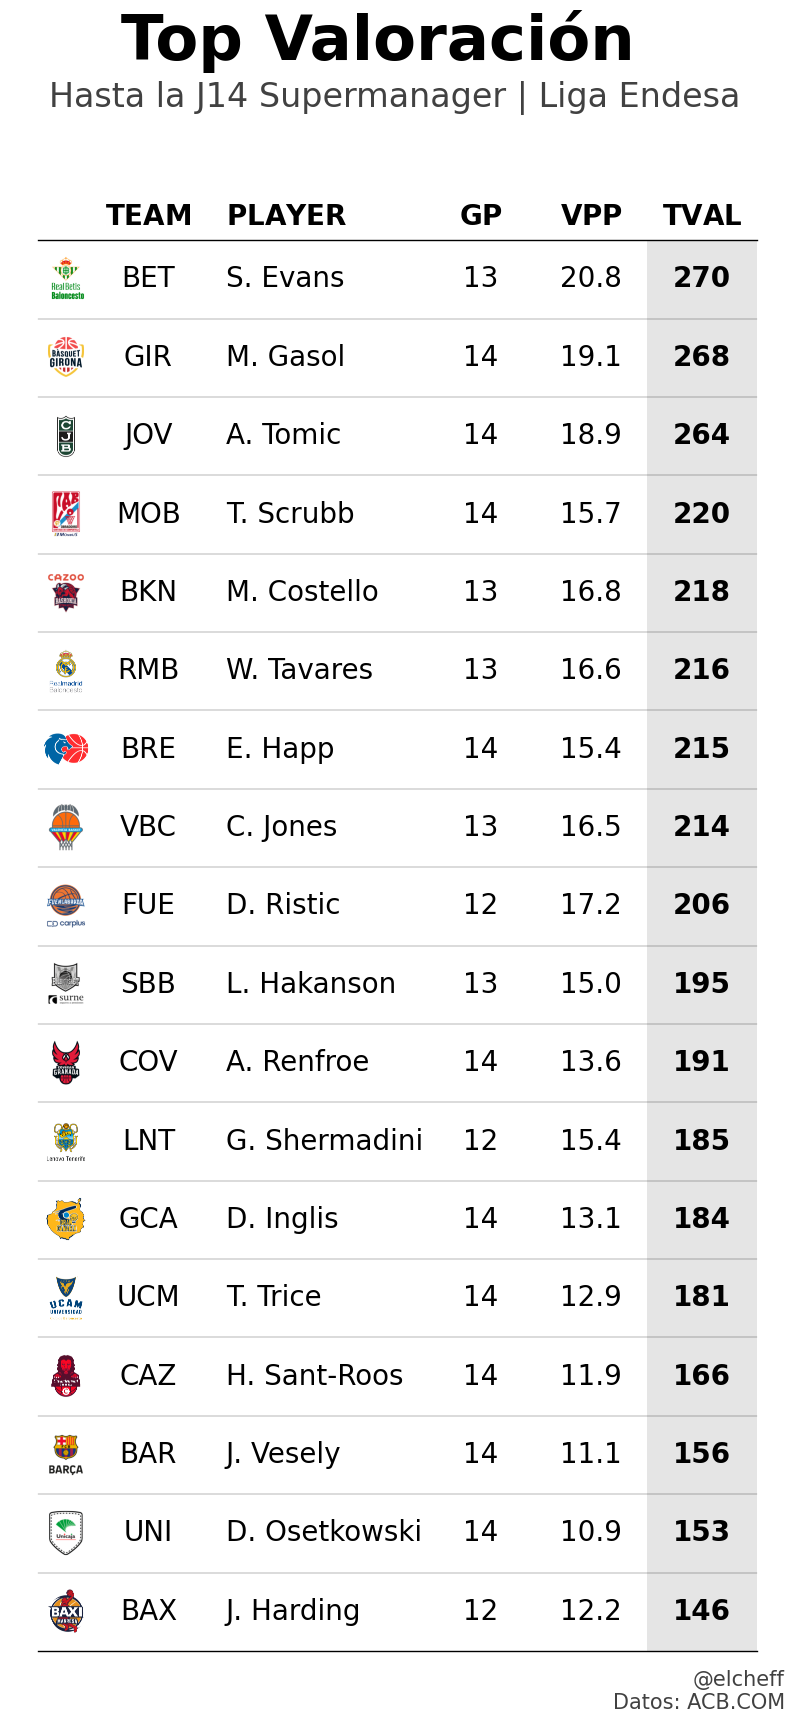

In [50]:

table_cols = ["abb","license_licenseAbbrev", "games", "media", "val_total" ]
#intento de tabla
d[table_cols]



table_col_defs = [
    ColDef("logo", width=0.05, plot_fn=image, title="",textprops={"ha": "right"}),
    ColDef("abb", width=0.1, title="\n$\\bf{TEAM}$"),
    ColDef("license_licenseAbbrev", width=0.2, title="\n$\\bf{PLAYER}$",textprops={"ha": "left"}),
    ColDef("val_total", width=0.1, title="\n$\\bf{TVAL}$", textprops={"weight": 600}),
    ColDef("games", width=0.1, title="\n$\\bf{GP}$"),
    ColDef("media", width=0.1, title="\n$\\bf{VPP}$"),
]

fig, ax = plt.subplots(figsize=(10, 12*1.618))

font = {'family': 'Roboto Medium',
        'color':  'black',
        'weight': 600,
        'size': 45,
        }


plt.rcParams["font.family"] = "Roboto Medium"
plt.text(
     0.075, -2.3,
     'Top Valoración', fontdict=font)
plt.text(
     0.01, -1.7,
     'Hasta la J14 Supermanager | Liga Endesa',
     fontdict={'size': 24,
     'weight': 400,
     'color':"#414141"})
ax.text(
    1, -0.01,
    "@elcheff\nDatos: ACB.COM",
    ha="right",
    va="top",
    transform=ax.transAxes,
    fontweight=500,
    fontsize=15,
    color="#414141"
)

table = Table(
    d,
    column_definitions=table_col_defs,
    row_dividers=True,
    col_label_divider=True,
    footer_divider=True,
    columns=table_cols,
    textprops={"fontsize": 20, "ha": "center", "fontname": "Roboto Medium"},
)

rect = patches.Rectangle(
	(.55, 0),  # bottom left starting position (x,y)

	.1,  # width

	18,  # height

	ec='none',
	fc='grey',
	alpha=.2,
	zorder=1
)
ax.add_patch(rect)

plt.savefig("topValoradores.png", dpi=300)
plt.show()